## Курсовой проект
# Теория вероятностей и математическая статистика

**Общая постановка задачи**: проанализировать данные о 25 кинофильмах о Джеймсе Бонде, выявить по ним факторы, влияющие на кассовый успех фильма и его прием зрителями и критиками, а также попытаться ответить на вопрос - стала ли серия со временем хуже.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

**План отчета:**
 - Часть 1. Загрузка данных и их описание
 - Часть 2. Предварительный анализ
 - Часть 3. Дисперсионный анализ
 - Часть 4. Корреляционный анализ
 - Итоги

## Часть 1. Загрузка данных и их описание

Загрузим из файла `mojo_imdb.csv` подготовленные данные по 24 официальным фильмам о Джеймсе Бонде и одному неофициальному («Никогда не говори „никогда“» с Шоном Коннери).

В файле приведены следующие данные:
 - *Release* - дата выхода;
 - *Title* - название;
 - *Studio* - кинокомпания;
 - *Gross / Box*, *Gross / Theaters* - общие сборы и количество прокатывавших кинотеатров в США (boxofficemojo.com);
 - *Opening / Box*, *Opening / Theaters* (boxofficemojo.com) - премьерные сборы и количество кинотеатров, давших премьеру, в США (boxofficemojo.com);
 - *Adjusted Gross* - сборы в США с поправкой на инфляцию по цене билета (boxofficemojo.com);
 - *Budget* - оценка бюджета на момент съемок (imdb.com);
 - *Length* - длительность;
 - *irector*, *Producer* - режиссер и продюсеры;
 - *Bond* - исполнитель главной роли;
 - *M*, *Q*, *Miss Moneypenny* - исполнители ролей шефа Бонда M, изобретателя шпионских девайсов Q и мисс Манипенни, секретаря M;
 - *Music*, *Song* - композитор и исполнение заглавной песни;
 - *IMDB*, *Kinopoisk*, *Metacritic* - пользовательные оценки на сайтах imdb.com, kinopoisk.ru и сводные оценки критиков metacritic.com.

В качестве индекса зададим поле *Release* с датой выхода фильма:

In [2]:
df = pd.read_csv('mojo_imdb.csv', encoding='utf-8')
df.Release = pd.to_datetime(df.Release)
df.set_index('Release', inplace=True)

df

,Title,Studio,Gross / Box,Gross / Theaters,Opening / Box,Opening / Theaters,Adjusted Gross,Director,Producer,Bond,M,Q,Length,Miss Moneypenny,Music,Song,Budget,IMDB,Metacritic,Kinopoisk
Release,,,,,,,,,,,,,,,,,,,,
1963-08-05,Dr. No,UA,16067035.0,0,0.0,0,170310600.0,Terence Young,"Harry Saltzman, Albert R. Broccoli",Sean Connery,Bernard Lee,-,109,Lois Maxwell,Monty Norman,Monty Norman,1.1,7.3,78,7.6
1964-08-04,"From Russia, with Love",UA,24796765.0,0,0.0,0,240235300.0,Terence Young,"Harry Saltzman, Albert R. Broccoli",Sean Connery,Bernard Lee,Desmond Llewelyn,115,Lois Maxwell,John Barry,Matt Monro,2.0,7.4,85,7.4
1964-12-22,Goldfinger,UA,51081062.0,0,0.0,0,597363000.0,Guy Hamilton,"Harry Saltzman, Albert R. Broccoli",Sean Connery,Bernard Lee,Desmond Llewelyn,110,Lois Maxwell,John Barry,Shirley Bassey,3.0,7.7,87,7.7
1965-12-21,Thunderball,UA,63595658.0,0,0.0,0,673948000.0,Terence Young,Kevin McClory,Sean Connery,Bernard Lee,Desmond Llewelyn,130,Lois Maxwell,John Barry,Tom Jones,9.0,7.0,64,7.4
1967-06-13,You Only Live Twice,UA,43084787.0,0,0.0,0,323494900.0,Lewis Gilbert,"Harry Saltzman, Albert R. Broccoli",Sean Connery,Bernard Lee,Desmond Llewelyn,115,Lois Maxwell,John Barry,Nancy Sinatra,9.5,6.9,61,7.2
1969-12-18,On Her Majesty's Secret Service,UA,22774493.0,0,0.0,0,144505800.0,Peter R. Hunt,"Harry Saltzman, Albert R. Broccoli",George Lazenby,Bernard Lee,Desmond Llewelyn,140,Lois Maxwell,John Barry,Louis Armstrong,7.0,6.8,61,6.7
1971-12-17,Diamonds Are Forever,UA,43819547.0,0,0.0,0,239281300.0,Guy Hamilton,"Harry Saltzman, Albert R. Broccoli",Sean Connery,Bernard Lee,Desmond Llewelyn,120,Lois Maxwell,John Barry,Shirley Bassey,7.2,6.7,59,7.2
1973-06-27,Live and Let Die,UA,35377836.0,0,0.0,0,180087200.0,Guy Hamilton,"Harry Saltzman, Albert R. Broccoli",Roger Moore,Bernard Lee,-,120,Lois Maxwell,George Martin,Paul McCartney & Wings,7.0,6.8,55,6.9
1974-12-18,The Man with the Golden Gun,UA,20972000.0,0,0.0,0,101046900.0,Guy Hamilton,"Harry Saltzman, Albert R. Broccoli",Roger Moore,Bernard Lee,Desmond Llewelyn,125,Lois Maxwell,John Barry,Lulu,7.0,6.8,43,7.0


## Часть 2. Предварительный анализ

Реализуем вспомигательную функцию *plot_bond_recasts*, отображающую вертикальными линиями замены исполнителя роли Бонда относительно даты .

Две пунктирные линии соответствуют «На секретной службе её величества», единственному фильму с Джорджем Лэзенби, и неофициальному «Никогда не говори „никогда“» с Шоном Коннери.

In [3]:
def plot_bond_recasts(color, alpha):
    for d in ('1963-08-05', '1969-12-18', '1973-06-27', '1983-07-10', \
              '1987-07-31', '1995-11-17', '2006-11-17'):
        linestyle = 'dashed' if d in ('1969-12-18', '1983-07-10') else 'solid'
        plt.axvline(x=pd.to_datetime(d), color=color, alpha=alpha, linestyle=linestyle)

Построим графики сборов в США - с поправкой на инфляцию (*Adjusted Gross*) и без (*Gross / Box*):

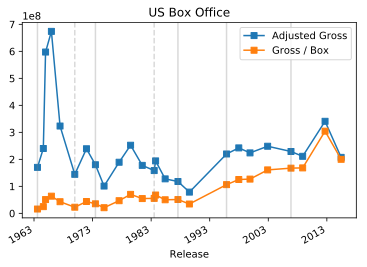

In [4]:
df['Adjusted Gross'].plot(marker='s')
df['Gross / Box'].plot(marker='s')
plot_bond_recasts('grey', 0.3)
plt.title('US Box Office')
plt.legend(loc='best')
plt.show()

По растущему тренду графика сборов *Gross / Box* прекрасно видно влияние инфляции. Для сравнительного анализа этот признак не особо полезен; поэтому в качестве показателя сборов здесь и в дальнейшем будем рассматривать данные с поправкой на инфляцию (*Adjusted Gross*) - хотя, строго говоря, методика самой поправки весьма условна и небесспорна.

Построим также график прибыльности фильмов как соотношение их бюджета к сборам в США с учетом того, что бюджет дан в миллионах долларов без поправки на инфляцию:

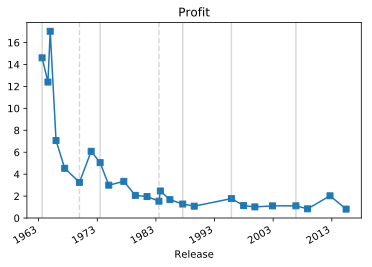

In [5]:
profit = df['Gross / Box'] / (df['Budget'] * 1e6)

profit.plot(marker='s')
plot_bond_recasts('grey', 0.3)
plt.title('Profit')
plt.show()

По приведенным графикам можно предварительно сделать следующие выводы:
 - наиболее прибыльными стали первые три фильма с Шоном Коннери, а наиболее кассовыми - третий и четвертый;
 - после четвертого фильма прибыльность серии резко падает; немного, но не особо  ситуацию спасает возвращение Шона Коннери в его последний официальный фильм «Бриллианты навсегда»;
 - с конца 70-х гг. прибыльность держится примерно на уровне 1.5-2 раза;
 - наименее кассовыми выглядят фильмы 70-80-х гг. за редкими исключениями («Лунный гонщик»); по сравнению с ними фильмы 90-2000-х получают несколько большую кассу.
 
Построим зависимость длительности фильмов от даты выпуска:

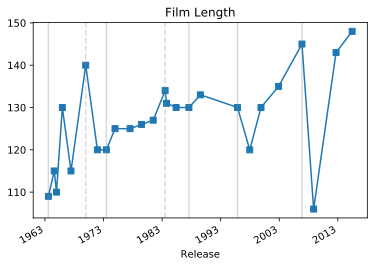

In [6]:
df['Length'].plot(marker='s')
plot_bond_recasts('grey', 0.3)
plt.title('Film Length')
plt.show()

Из графика видно постепенное увеличение длительности фильмов с 2 до 2.33-2.5 часов. Для блокбастеров это, в целом, исторически закономерный процесс; тем не менее, можно будет также проверить влияние длительности фильма на его успех. 

Получим общие рейтинги фильмов. Для этого:
 - разделим процентную оценку критиков с Metacritic на 10;
 - усредним оценки с IMDB, Metacritic и Кинопоиска.

In [7]:
df.Metacritic /= 10.
df['Mean Rate'] = df[['IMDB', 'Metacritic', 'Kinopoisk']].mean(axis=1)

Построим графики оценок фильмов (с IMDB, Metacritic, Кинопоиска и усредненный рейтинг), их гистограммы и оценки плотности распределения:

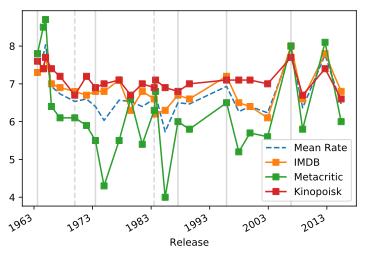

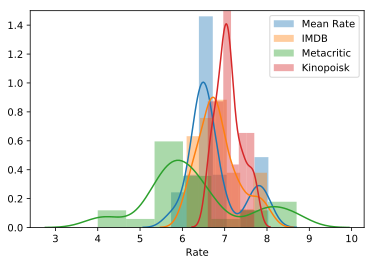

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)
df['Mean Rate'].plot(linestyle='dashed', ax=ax)
df[['IMDB', 'Metacritic', 'Kinopoisk']].plot(marker='s', ax=ax)
plot_bond_recasts('grey', 0.3)
plt.legend(loc='best')
plt.show()

for rate in ('Mean Rate', 'IMDB', 'Metacritic', 'Kinopoisk'):
    sns.distplot(df[rate], label=rate)
plt.legend(loc='best')
plt.xlabel('Rate')
plt.ylim([0, 1.5])
plt.show()

Распределения за счет малости выборки (хотя 25 фильмов - это серьезно) выглядят мультимодальными и далекими от нормального. Любопытно, что в эру интернета, с 2006-го г., оценки IMDB, Metacritic и Кинопоиска достаточно близки.

Оценки Metacritic наиболее разбросаны, например, за счет очень высокой оценки «Голдфингера» и низких оценок ряда фильмов с Рождером Муром. Оценки IMDB схожи с оценками Кинопоиска, но у оценок IMDB больше разброс, а среднее оценок Кинопоиска немного выше. Проверим это и с помощью расчета статистик:

In [9]:
df[['IMDB', 'Metacritic', 'Kinopoisk']].describe()

,IMDB,Metacritic,Kinopoisk
count,25.000000,25.000000,25.000000
mean,6.856000,6.264000,7.092000
std,0.492511,1.184933,0.305396
min,6.100000,4.000000,6.600000
25%,6.600000,5.600000,6.900000
50%,6.800000,6.000000,7.100000
75%,7.100000,6.600000,7.200000
max,8.000000,8.700000,7.700000


Рассчитаем корреляции между сборами фильма в США, его оценками с IMDB, Metacritic, Кинопоиска и длительностью фильма.

Методами расчета выберем:
 - коэффициент корреляции Пирсона (показывает силу линеной связи):

In [10]:
df[['Adjusted Gross', 'IMDB', 'Metacritic', 'Kinopoisk', 'Length']].corr(method='pearson')

,Adjusted Gross,IMDB,Metacritic,Kinopoisk,Length
Adjusted Gross,1.000000,0.372223,0.456181,0.528126,-0.170935
IMDB,0.372223,1.000000,0.713284,0.720583,-0.000862
Metacritic,0.456181,0.713284,1.000000,0.668143,-0.078812
Kinopoisk,0.528126,0.720583,0.668143,1.000000,-0.220812
Length,-0.170935,-0.000862,-0.078812,-0.220812,1.000000


 - коэффициент ранговой корреляции Спирмена (показывает силу монотонной связи):

In [11]:
df[['Adjusted Gross', 'IMDB', 'Metacritic', 'Kinopoisk', 'Length']].corr(method='spearman')

,Adjusted Gross,IMDB,Metacritic,Kinopoisk,Length
Adjusted Gross,1.000000,0.238503,0.452271,0.512819,-0.150756
IMDB,0.238503,1.000000,0.525150,0.605657,-0.126651
Metacritic,0.452271,0.525150,1.000000,0.497298,0.064217
Kinopoisk,0.512819,0.605657,0.497298,1.000000,-0.236259
Length,-0.150756,-0.126651,0.064217,-0.236259,1.000000


Некоторые выводы из построенных корреляций:
 - оценки IMDB, Metacritic и Кинопоиска достаточно высоко и положительно коррелируют друг с другом;
 - однако оценки IMDB заметно меньше коррелируют со сборами, чем оценки Metacritic и Кинопоиска;
 - длительность фильма слабо отрицательно или около нуля коррелирует с его сборами и оценками.

Построим боксплоты сборов и среднего рейтинга (по которым мы оцениваем успех фильма и влияние на успех различных факторов) для
 - исполнителей роли Джеймса Бонда:

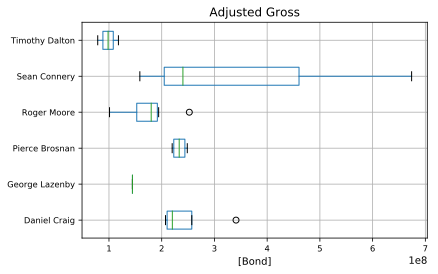

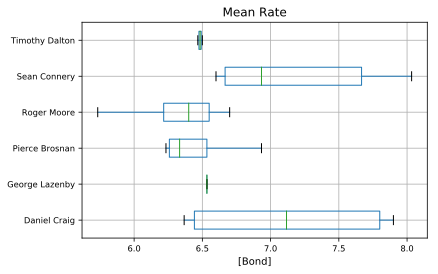

In [12]:
for column in ('Adjusted Gross', 'Mean Rate'):
    df[[column, 'Bond']].boxplot(by='Bond', vert=False, fontsize='small')
    plt.suptitle('')
    plt.show()

 - продюсерского состава:

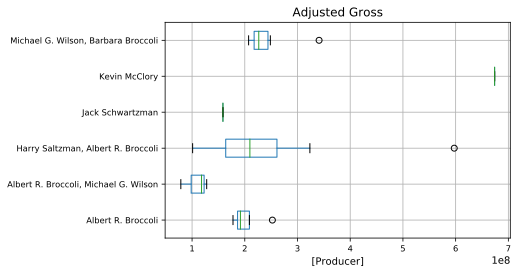

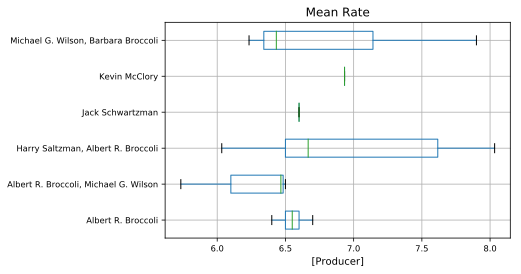

In [13]:
for column in ('Adjusted Gross', 'Mean Rate'):
    df[[column, 'Producer']].boxplot(by='Producer', vert=False, fontsize='small')
    plt.suptitle('')
    plt.show()

По построенным боксплотам для каждого из этих категориальных признаков можно сказать следующее:
 - разбросы их значений не одинаковы;
 - распределения большинства их значений не симметричны согласно положениям квантилей.
 
Исходя из последнего - данные распределения сложно рассматривать как нормальные, что требует аккуратности в применении статистических методов, требующих нормальности распределения, и особенно интерпретации результатов их работы.

Построим в подтверждение гистограммы и оценки распределений 
 - сборов в зависимости от некоторых исполнителей роли Джеймса Бонда: 

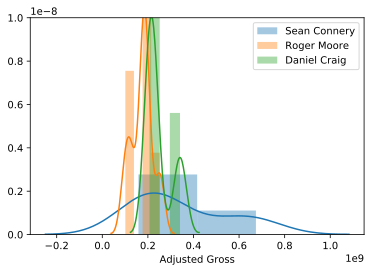

In [14]:
for Bond in ('Sean Connery', 'Roger Moore', 'Daniel Craig'):
    sns.distplot(df[df.Bond == Bond]['Adjusted Gross'], label=Bond)
plt.legend(loc='best')
plt.ylim([0, 1e-8])
plt.show()

 - сборов без категоризации:

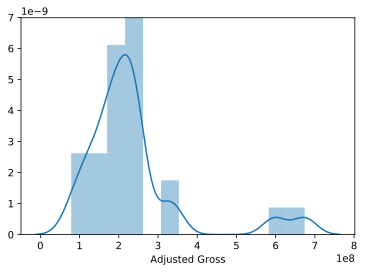

In [15]:
sns.distplot(df['Adjusted Gross'])
plt.show()

По графикам видно, что распределения могут быть мультимодальны, несколько скошены и действительно не похожи на нормальное.

## Часть 3. Дисперсионный анализ

Реализуем функцию *dispersion_analysis*, производящую дисперсионный анализ подаваемых на ее вход массивов и проверяющую гипотезу о равенстве их средних на уровнях значимости 0.01, 0.05, 0.1:

In [16]:
def dispersion_analysis(*args):
    ns = [len(a) for a in args]
    k = len(args)
    n = np.sum(ns)
    x_means = [np.mean(a) for a in args]
    x = np.concatenate([a for a in args])
    x_mean = np.mean(x)

    s2_f = 0.
    for x_m, n_g in zip(x_means, ns):
        s2_f += ((x_m - x_mean) ** 2) * n_g
    
    s2_residual = 0.
    for x_m, x_g in zip(x_means, args):
        s2_residual += np.sum((x_g - x_m) ** 2)
        
    sigma2_f = s2_f / (k - 1)
    sigma2_residual = s2_residual / (n - k)
    
    dfn = k - 1
    dfd = n - k    
    f_ratio = sigma2_f / sigma2_residual
    
    h0_test = u'Гипотеза о равенстве средних:'
    for q in (0.01, 0.05, 0.1):
        h0_test += u'\n на уровне {} '.format(q)
        f_table = f.ppf(1-q, dfn, dfd)
        if f_table >= f_ratio:
            h0_test += u'принята'
        else:
            h0_test += u'отвергнута'        
  
    print(h0_test)

Проверим с помощью дисперсионного анализа следующие гипотезы:
 - «Влияет ли на сборы фильма Лоис Максвелл в роли мисс Мани пенни?»

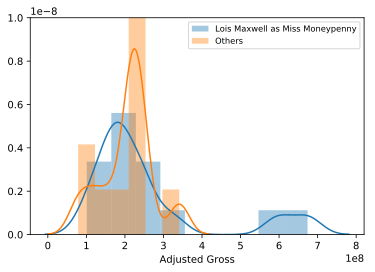

Гипотеза о равенстве средних:
 на уровне 0.01 принята
 на уровне 0.05 принята
 на уровне 0.1 принята


In [17]:
lois_maxwell = df['Miss Moneypenny'] == 'Lois Maxwell'

sns.distplot(df[lois_maxwell]['Adjusted Gross'], label='Lois Maxwell as Miss Moneypenny')
sns.distplot(df[~lois_maxwell]['Adjusted Gross'], label='Others')
plt.ylim([0, 1e-8])
plt.legend(loc='best', fontsize='small')
plt.show()

dispersion_analysis(df[lois_maxwell]['Adjusted Gross'],
                    df[~lois_maxwell]['Adjusted Gross'])

Ответ: нет, не влияет.

 - «Влияет ли на рейтинг фильма Лоис Максвелл в роли мисс Мани пенни?»

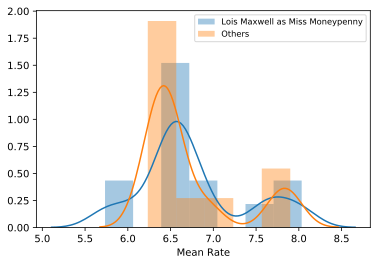

Гипотеза о равенстве средних:
 на уровне 0.01 принята
 на уровне 0.05 принята
 на уровне 0.1 принята


In [18]:
sns.distplot(df[lois_maxwell]['Mean Rate'], label='Lois Maxwell as Miss Moneypenny')
sns.distplot(df[~lois_maxwell]['Mean Rate'], label='Others')
plt.legend(loc='best', fontsize='small')
plt.show()

dispersion_analysis(df[lois_maxwell]['Mean Rate'],
                    df[~lois_maxwell]['Mean Rate'])

Ответ: нет, не влияет.

 - «Влияет ли на рейтинг фильма Бернард Ли в роли M?»

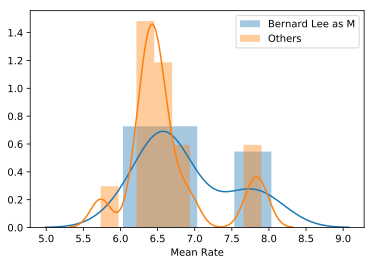

Гипотеза о равенстве средних:
 на уровне 0.01 принята
 на уровне 0.05 принята
 на уровне 0.1 принята


In [19]:
sns.distplot(df[df.M == 'Bernard Lee']['Mean Rate'], label='Bernard Lee as M')
sns.distplot(df[df.M != 'Bernard Lee']['Mean Rate'], label='Others')
plt.legend(loc='best')
plt.show()

dispersion_analysis(df[df.M == 'Bernard Lee']['Mean Rate'],
                    df[df.M != 'Bernard Lee']['Mean Rate'])

Ответ: нет, не влияет.

 - «Фильмы с Шоном Коннери и Роджером Муром имеют примерно одинаковые рейтинги»

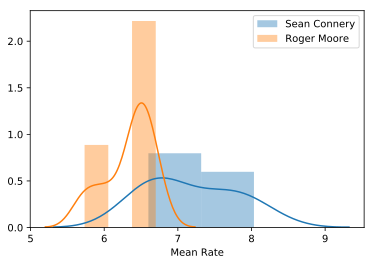

Гипотеза о равенстве средних:
 на уровне 0.01 отвергнута
 на уровне 0.05 отвергнута
 на уровне 0.1 отвергнута


In [20]:
sns.distplot(df[df.Bond == 'Sean Connery']['Mean Rate'], label='Sean Connery')
sns.distplot(df[df.Bond == 'Roger Moore']['Mean Rate'], label='Roger Moore')
plt.legend(loc='best')
plt.show()

dispersion_analysis(df[df.Bond == 'Sean Connery']['Mean Rate'],
                    df[df.Bond == 'Roger Moore']['Mean Rate'])

Ответ: нет, рейтинги существенно различаются.

 - «Фильмы с Шоном Коннери, Пирсом Броснаном и Дэниелом Крэйгом имеют примерно одинаковые рейтинги»

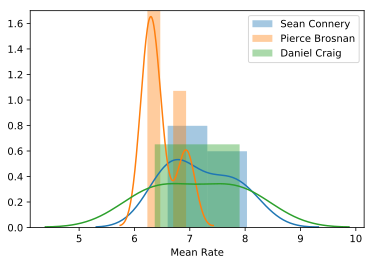

Гипотеза о равенстве средних:
 на уровне 0.01 принята
 на уровне 0.05 принята
 на уровне 0.1 принята


In [21]:
sns.distplot(df[df.Bond == 'Sean Connery']['Mean Rate'], label='Sean Connery')
sns.distplot(df[df.Bond == 'Pierce Brosnan']['Mean Rate'], label='Pierce Brosnan')
sns.distplot(df[df.Bond == 'Daniel Craig']['Mean Rate'], label='Daniel Craig')
plt.ylim([0, 1.7])
plt.legend(loc='best')
plt.show()

dispersion_analysis(df[df.Bond == 'Sean Connery']['Mean Rate'],
                    df[df.Bond == 'Pierce Brosnan']['Mean Rate'],
                    df[df.Bond == 'Daniel Craig']['Mean Rate'])

Ответ: да, рейтинги примерно одинаковы.

 - «Фильмы с Шоном Коннери, Роджером Муром и Пирсом Броснаном имеют примерно одинаковые рейтинги»

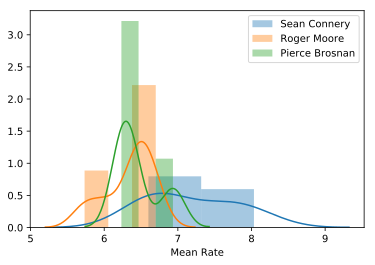

Гипотеза о равенстве средних:
 на уровне 0.01 отвергнута
 на уровне 0.05 отвергнута
 на уровне 0.1 отвергнута


In [22]:
sns.distplot(df[df.Bond == 'Sean Connery']['Mean Rate'], label='Sean Connery')
sns.distplot(df[df.Bond == 'Roger Moore']['Mean Rate'], label='Roger Moore')
sns.distplot(df[df.Bond == 'Pierce Brosnan']['Mean Rate'], label='Pierce Brosnan')
plt.legend(loc='best')
plt.show()

dispersion_analysis(df[df.Bond == 'Sean Connery']['Mean Rate'],
                    df[df.Bond == 'Roger Moore']['Mean Rate'],
                    df[df.Bond == 'Pierce Brosnan']['Mean Rate'])

Ответ: нет, рейтинги существенно различаются.

 - «Фильмы с Роджером Муром и Пирсом Броснаном имеют примерно одинаковые рейтинги» (проверим без Шона Коннери):

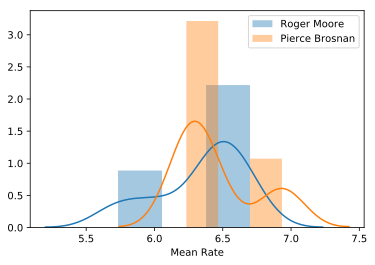

Гипотеза о равенстве средних:
 на уровне 0.01 принята
 на уровне 0.05 принята
 на уровне 0.1 принята


In [23]:
sns.distplot(df[df.Bond == 'Roger Moore']['Mean Rate'], label='Roger Moore')
sns.distplot(df[df.Bond == 'Pierce Brosnan']['Mean Rate'], label='Pierce Brosnan')
plt.legend(loc='best')
plt.show()

dispersion_analysis(df[df.Bond == 'Roger Moore']['Mean Rate'],
                    df[df.Bond == 'Pierce Brosnan']['Mean Rate'])

Ответ: да, рейтинги примерно одинаковы.

Как видно по графикам, гипотеза о равенстве средних отвергается в случаях, если распределения разнесены достаточно отчетливо.

Несмотря на то, что распределения признаков не всегда схожи с нормальным, разбросы значений не одинаковы, а выборки не случайны (чего для своей хорошей работы требует дисперсионный анализ), выводы получились вполне адекватными.

## Часть 4. Корреляционный анализ

Рассмотрим некоторые категориальные признаки, влияние которых на кассовый и зрительских успех фильма, было бы интересно изучить:
 - режиссера и продюсеров;
 - исполнителя главной роли;
 - кинокомпании; 
 - исполнителей ролей M, Q и мисс Манипенни;
 - композитора.
 
Построим их количественные диаграммы:

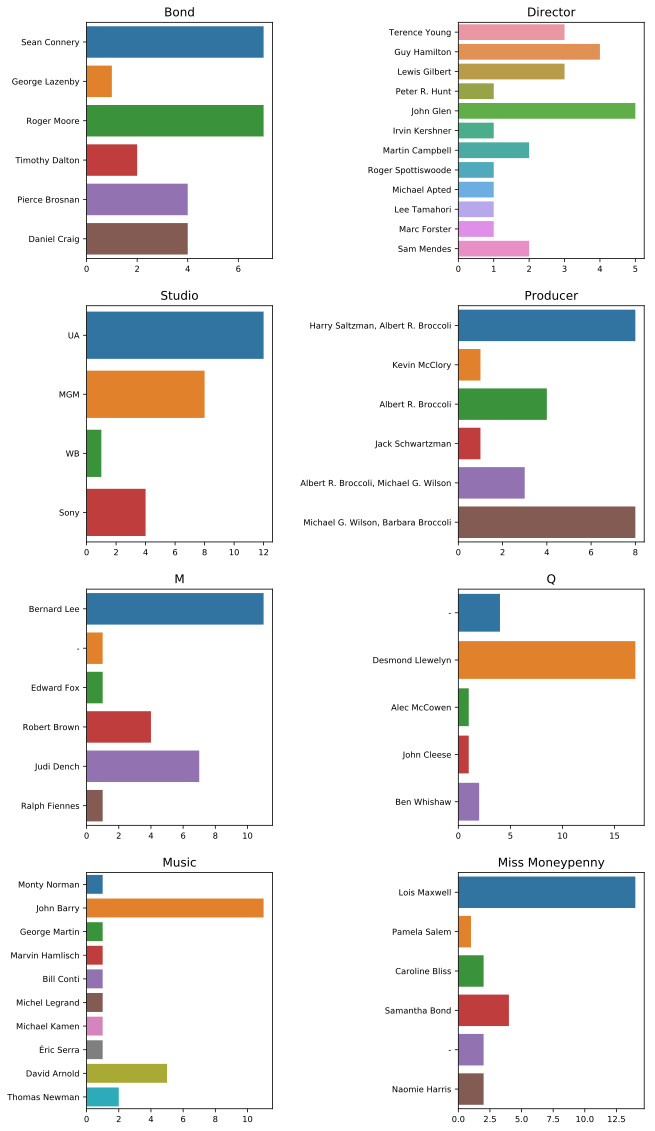

In [24]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 20))

for column, ax in zip(['Bond', 'Director', 'Studio', 'Producer', 'M', 'Q', 'Music', 'Miss Moneypenny'], axes.flatten()):
    sns.countplot(y=column, data=df, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(labelsize='small')

plt.subplots_adjust(wspace=1)

Реализуем функцию *correlation_analysis*, отражающую графически корреляцию значений этих признаков со сборами и рейтингами фильмов. Наличие корреляции проверяется следующим образом - находим среднее по сборам и рейтингу для какого-либо значения рассматриваемого признака (1) и среднее для остальных значений признака (0). Если на отрезке [0; 1] наклон получающейся прямой положительный, корреляция данного значения со сборами или рейтингом положительная, если отрицательный - корреляция отрицательная.

In [25]:
def correlation_analysis(df, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
    for score, ax in zip(['Adjusted Gross', 'Mean Rate'], axes.flatten()):
        for label in set(df[feature]):
            ax.plot([0, 1],
                    [df[df[feature] != label][score].mean(),
                     df[df[feature] == label][score].mean()],
                    label=label)
        ax.set_title(score)        
        ax.set_xticklabels(['', '0', '', '', '', '', '1'])
        ax.legend(loc='best', fontsize='small')

 - Корреляция исполнителя роли Джеймса Бонда со сборами и рейтингом:

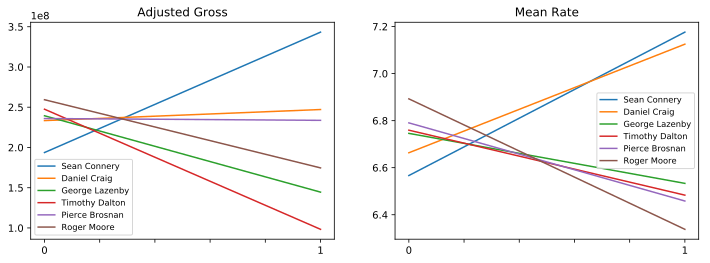

In [26]:
correlation_analysis(df, 'Bond')

Исполнение главной роли Шоном Коннери обеспечивает наивысшую положительную корреляцию со сборами и рейтингом фильмов. Участие Дэниела Крэйга имеет схожую корреляцию по рейтингу (все остальные - отрицательную, хуже влияние на рейтинг у Роджера Мура). Влияние участия Пирса Броснана и Дэниела Крэйга на сборы околонулевое, у остальных исполнителей - корреляция отрицательная, ниже всех у Тимоти Далтона.

 - Корреляция киностудии со сборами и рейтингом:

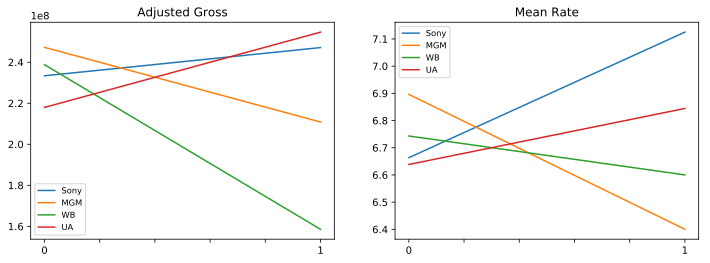

In [27]:
correlation_analysis(df, 'Studio')

Студии United Artists и Sony имеют положительные корреляции со сборами и рейтингом, остальные студии - отрицательные. У студии Warner Bros. выше отрицательная корреляция со сборами, поскольку в ее активе только один фильм («Никогда не говори „никогда“»).

 - Корреляция продюсерского состава со сборами и рейтингом:

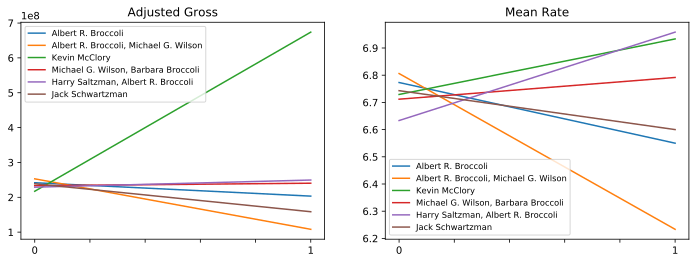

In [28]:
correlation_analysis(df, 'Producer')

Наивысшую положительную корреляцию со сборами и одну из самых высоких корреляций с рейтингами имеет Кевин МакКлори («Шаровая молния»). Тандемы Гарри Зальцмана и Альберта Брокколи (фильмы 60-70-х гг.), Майкла Дж. Уилсона и Барбары Брокколи (фильмы 90-2000-х гг.) также имеют положительные корреляции в обоих случаях, остальные продюсерские составы - отрицательные. Самые низкие корреляции у Альберта Брокколи и Майкла Дж. Уилсона (фильмы 80-х гг.).

 - Корреляция исполнителя роли M со сборами и рейтингом:

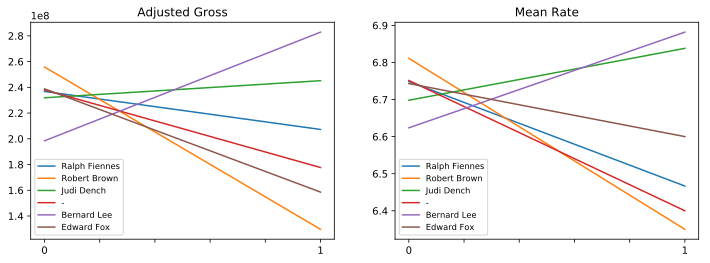

In [29]:
correlation_analysis(df, 'M')

Бернард Ли (фильмы с 60-х по начало 80-х гг.) и Джуди Денч (фильмы 90-2000-х гг.) обеспечивают положительную корреляцию со сборами и рейтингом, остальные - отрицательную (для Денч корреляция ниже). Наивысшая отрицательная корреляция в обоих случаях у Роберта Брауна (фильмы 80-х гг.).

- Корреляция исполнительницы роли мисс Манипенни со сборами и рейтингом:

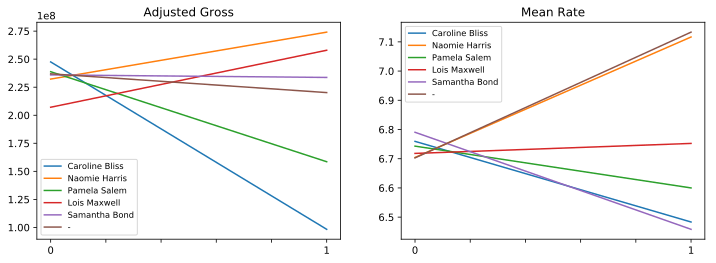

In [30]:
correlation_analysis(df, 'Miss Moneypenny')

Лоис Максвелл (фильмы с 60-х по середину 80-х гг.) и Наоми Харрис (фильмы 2010-х гг.) обеспечивают положительную корреляцию со сборами и рейтингом, остальные - отрицательную.

 - Корреляция исполнителя роли Q со сборами и рейтингом:

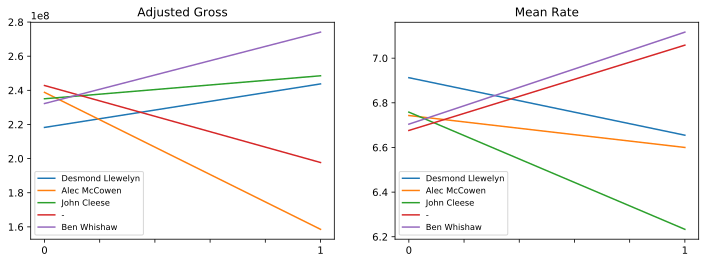

In [31]:
correlation_analysis(df, 'Q')

Бен Уишоу (фильмы 2010-х гг.) имеет положительную корреляцию со сборами и с рейтингом, отрицательная в обоих случая - у Алека Маккоуэна («Никогда не говори „никогда“»). У самого "постоянного" актера серии Десмонда Ллевелина (фильмы 60-90-х гг.) положительная корреляция со сборами, отрицательная - с рейтингами.

 - Корреляция выбора режиссера со сборами и рейтингом (для режиссеров, поставивших более одного фильма в серии):

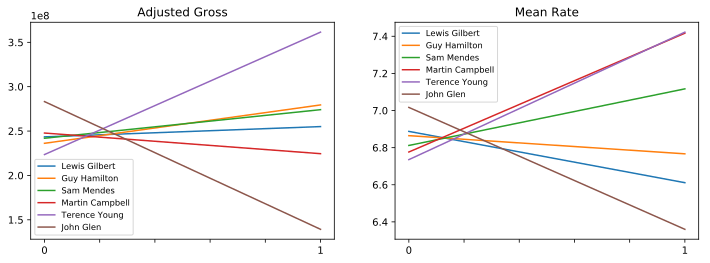

In [32]:
director_counts = df.Director.value_counts()
directors_top = director_counts[director_counts > 1].index

correlation_analysis(df[df.Director.isin(directors_top)], 'Director')

Положительную корреляцию со сборами и рейтингом имеют Теренс Янг (фильмы 60-х гг.) и Сэм Мендес (фильмы 2010-х гг.), отрицательную также в обоих случаях - у Джона Глена (фильмы 80-х гг.).

 - Корреляция выбора композитора со сборами и рейтингом (для композиторов, написавших музыку для более одного фильма в серии):

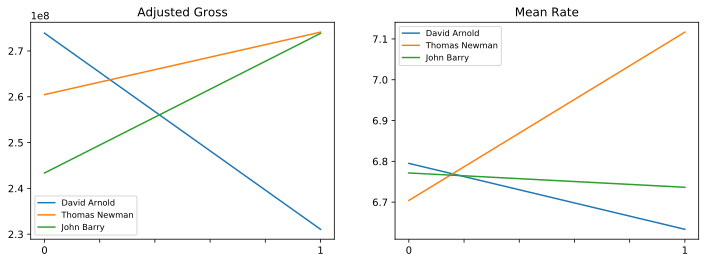

In [33]:
composer_counts = df.Music.value_counts()
composers_top = composer_counts[composer_counts > 1].index

correlation_analysis(df[df.Music.isin(composers_top)], 'Music')

Томас Ньюман (фильмы 2010-х гг.) имеет положительную корреляцию со сборами и рейтингом, Дэвид Арнольд (фильмы 90-2000-х гг.) - отрицательную. Джон Барри (фильмы 60-80-х гг.) имеет положительную корреляцию со сборами, а с рейтингом - отрицательную, практически околонулевую, поскольку, возможно, среди его 11 фильмах есть как успешные фильмы, так и считающиеся провалом.

## Итоги

Серия после первоначального успеха в 70-80-х гг. получала достаточно ощутимые провалы в сборах и у критиков. Однако, как можно увидеть по графикам сборов, оценок зрителей и критиков уровень серии в целом установился на определенную планку и на данный момент немного повысился. Схожие корреляции признаков, соответствующих старым и новым фильмам, также это подтверждают.